# Seattle Housing Prices Analysis

- Change in housing price by year
- Correlation with other asset prices
- Correlation with socio-economic data
- Forecast 

In [1]:
import pandas as pd
import hvplot
import hvplot.pandas
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import plotly.express as px

## Change in housing price by year

- plotting line chart sale price vs year
- mapbox plot for regions

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [3]:
# Load city coordinates data
file_path = Path('Resources/GreaterSeattle_Geocoding.csv')
city_loc_df = pd.read_csv(file_path)
city_loc_df.head(10)

zip         city   latitude   longitude
0  98001       Auburn  47.303722 -122.266080
1  98002       Auburn  47.304221 -122.216020
2  98003  Federal Way  47.311072 -122.311880
3  98004     Bellevue  47.618371 -122.203080
4  98005     Bellevue  47.611021 -122.168580
5  98006     Bellevue  47.562975 -122.152600
6  98007     Bellevue  47.610935 -122.141040
7  98008     Bellevue  47.609222 -122.115500
8  98009     Bellevue  47.432251 -121.803388
9  98011      Bothell  47.751471 -122.202570

In [4]:
city_loc_df.shape

(199, 4)

In [5]:
# Calculate the mean values for each city
mean_coordinates_df = city_loc_df[
    ['city', 'latitude', 'longitude']
].groupby(city_loc_df['city']
).mean()

mean_coordinates_df.reset_index(inplace=True)
mean_coordinates_df.head(10)

city   latitude   longitude
0             Auburn  47.334370 -122.112192
1  Bainbridge Island  47.655260 -122.535080
2           Bellevue  47.561833 -122.065971
3            Bothell  47.649947 -122.046825
4          Bremerton  47.581878 -122.651102
5              Brier  47.792011 -122.271957
6             Burien  47.466839 -122.340530
7         Des Moines  47.391630 -122.311560
8             DuPont  47.097420 -122.630530
9             Duvall  47.738284 -121.970249

In [6]:
mean_coordinates_df.shape

(45, 3)

In [20]:
# Load housing prices by month data
file_path = Path('Resources/housing_prices_month_clean.csv')
housing_price_df = pd.read_csv(file_path)
housing_price_df.head(10)

Region        Date  Median Sale Price Homes Sold New Listings  \
0  Auburn, WA   1/31/2012                188         81          118   
1  Auburn, WA   2/29/2012                206        102          161   
2  Auburn, WA   3/31/2012                197         97          149   
3  Auburn, WA   4/30/2012                209        127          168   
4  Auburn, WA   5/31/2012                225        109          147   
5  Auburn, WA   6/30/2012                220        123          154   
6  Auburn, WA   7/31/2012                212        132          167   
7  Auburn, WA   8/31/2012                220        108          127   
8  Auburn, WA   9/30/2012                230        129          115   
9  Auburn, WA  10/31/2012                245        110          103   

  Inventory  Days on Market  Days on Market MoM  Days on Market YoY  
0       447             107                  38                  10  
1       461              97                 -10                  17  
2       439              88                  -9                  -9  
3       443              73                 -15                 -26  
4       415              58                 -15                 -20  
5       428              50                  -8                 -28  
6       439              60                  10                   1  
7       419              53                  -7                 -12  
8       377              62                   9                 -23  
9       354              45                 -17                 -34

In [21]:
housing_price_df['Region'] = housing_price_df['Region'].str.split(',', expand=True)[0]

In [22]:
housing_price_df.head()

Region       Date  Median Sale Price Homes Sold New Listings Inventory  \
0  Auburn  1/31/2012                188         81          118       447   
1  Auburn  2/29/2012                206        102          161       461   
2  Auburn  3/31/2012                197         97          149       439   
3  Auburn  4/30/2012                209        127          168       443   
4  Auburn  5/31/2012                225        109          147       415   

   Days on Market  Days on Market MoM  Days on Market YoY  
0             107                  38                  10  
1              97                 -10                  17  
2              88                  -9                  -9  
3              73                 -15                 -26  
4              58                 -15                 -20

In [23]:
housing_price_df['Date'] = pd.to_datetime(housing_price_df['Date'])

In [24]:
housing_price_year_end_df = housing_price_df[housing_price_df['Date'].dt.is_year_end]

In [25]:
housing_price_year_end_df.head(10)

Region       Date  Median Sale Price Homes Sold New Listings  \
11              Auburn 2012-12-31                247        111          119   
23              Auburn 2013-12-31                255         85          131   
35              Auburn 2014-12-31                290         85          123   
47              Auburn 2015-12-31                304         92          119   
59              Auburn 2016-12-31                327        124          114   
71              Auburn 2017-12-31                360        113          112   
83              Auburn 2018-12-31                384        112           86   
95              Auburn 2019-12-31                420         70          114   
107             Auburn 2020-12-31                477         86          123   
120  Bainbridge Island 2012-12-31                349         24           40   

    Inventory  Days on Market  Days on Market MoM  Days on Market YoY  
11        328              52                   2                 -17  
23        356              46                  -6                  -6  
35        321              49                   0                   3  
47        220              50                  17                   1  
59        160              42                  15                  -8  
71        102              32                   6                 -10  
83        161              43                  -4                  11  
95        112              19                   2                 -24  
107        57               6                  -1                 -13  
120       122             111                  36                 -56

In [28]:
# Line chart for housing price 
housing_price_plot = housing_price_year_end_df.hvplot.line(
    x='Date', 
    y='Median Sale Price', 
    xlabel='Date', 
    ylabel='Median Sale Price(K)', 
    color='purple', 
    width = 800,
    title='Median Sale Price',
    rot=45,
    groupby='Region'
)
housing_price_plot

:DynamicMap   [Region]
   :Curve   [Date]   (Median Sale Price)

In [14]:
mean_coordinates_df.rename(columns={'city' : 'Region'}, inplace=True)
mean_coordinates_df.head()

Region   latitude   longitude
0             Auburn  47.334370 -122.112192
1  Bainbridge Island  47.655260 -122.535080
2           Bellevue  47.561833 -122.065971
3            Bothell  47.649947 -122.046825
4          Bremerton  47.581878 -122.651102

In [15]:
combined_housing_price_df = pd.merge(housing_price_df, mean_coordinates_df, on='Region')
combined_housing_price_df.head()

Region       Date  Median Sale Price Homes Sold New Listings Inventory  \
0  Auburn 2012-01-31                188         81          118       447   
1  Auburn 2012-02-29                206        102          161       461   
2  Auburn 2012-03-31                197         97          149       439   
3  Auburn 2012-04-30                209        127          168       443   
4  Auburn 2012-05-31                225        109          147       415   

   Days on Market  Days on Market MoM  Days on Market YoY  latitude  \
0             107                  38                  10  47.33437   
1              97                 -10                  17  47.33437   
2              88                  -9                  -9  47.33437   
3              73                 -15                 -26  47.33437   
4              58                 -15                 -20  47.33437   

    longitude  
0 -122.112192  
1 -122.112192  
2 -122.112192  
3 -122.112192  
4 -122.112192

In [16]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)
def plot_mapbox(date):
    """
     Takes a date in mm/dd/yyyy format and plots a mapbox 
     for the median house price by region.
    """
    df = combined_housing_price_df[combined_housing_price_df['Date'] == date]
    return px.scatter_mapbox(
        df,
        lat="latitude",
        lon="longitude",
        color="Median Sale Price",
        size="Median Sale Price",
        hover_name="Region", 
        hover_data=["Median Sale Price"],
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=12,
        zoom=7
    )
    housing_price_map.show()

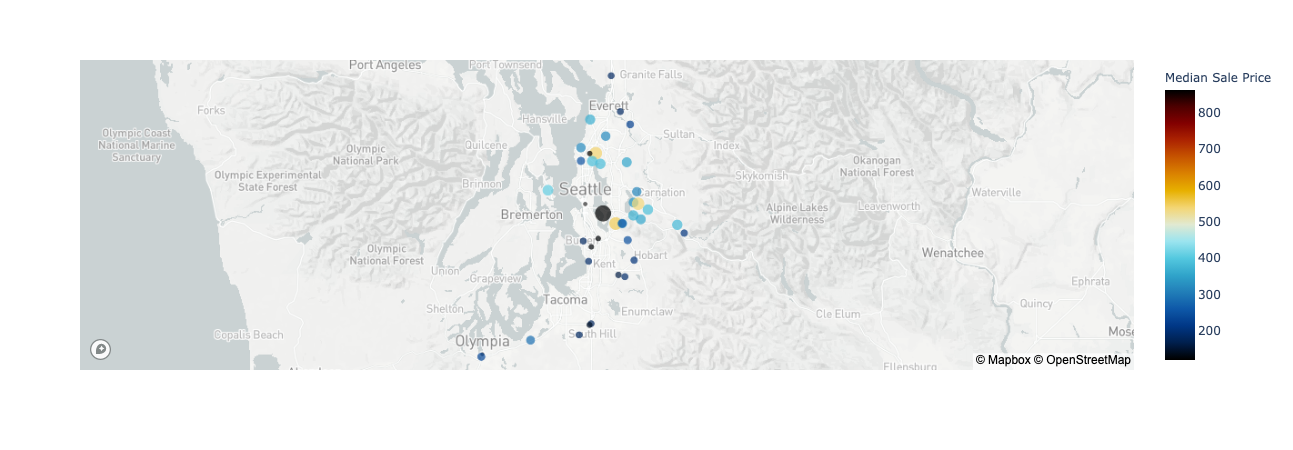

In [17]:
plot_mapbox('1/31/2012')

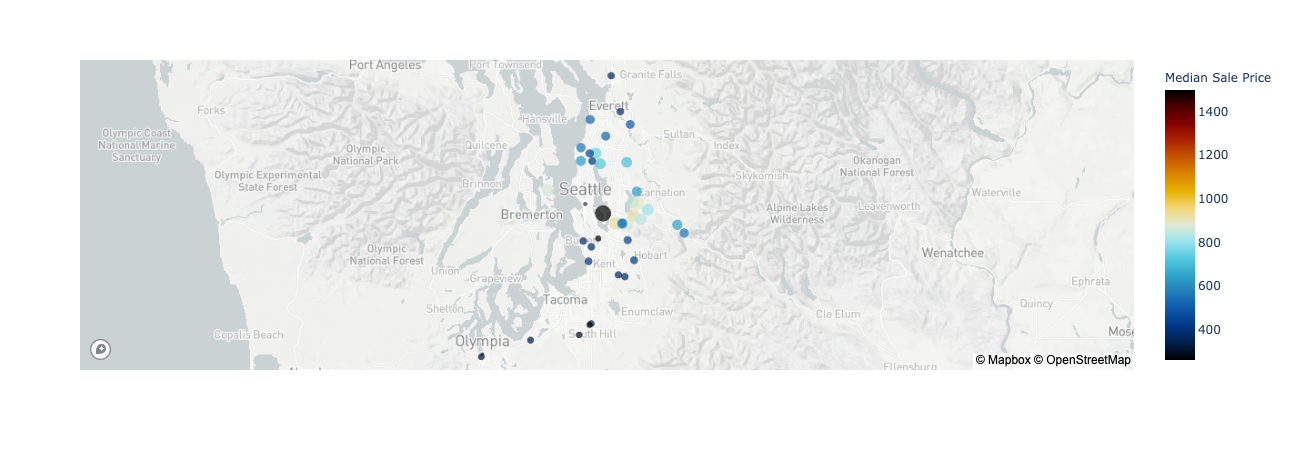

In [18]:
plot_mapbox('12/31/2017')

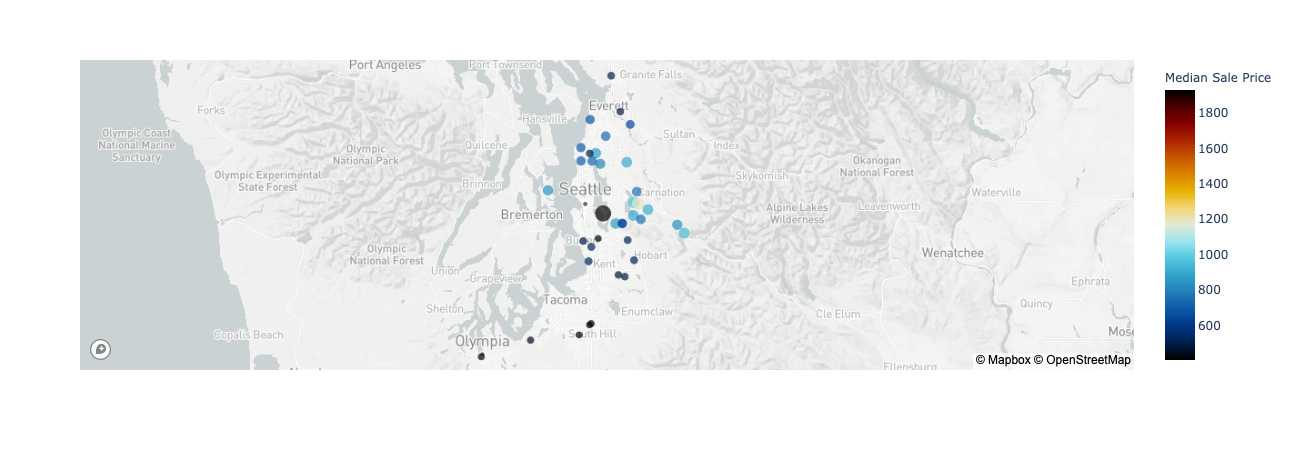

In [19]:
plot_mapbox('12/31/2020')